In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
 titanic = sns.load_dataset("titanic")

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

In [12]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# encode

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [19]:
X = titanic[features]
y = titanic[target]

In [20]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [22]:
# decision tree Model

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.770949720670391


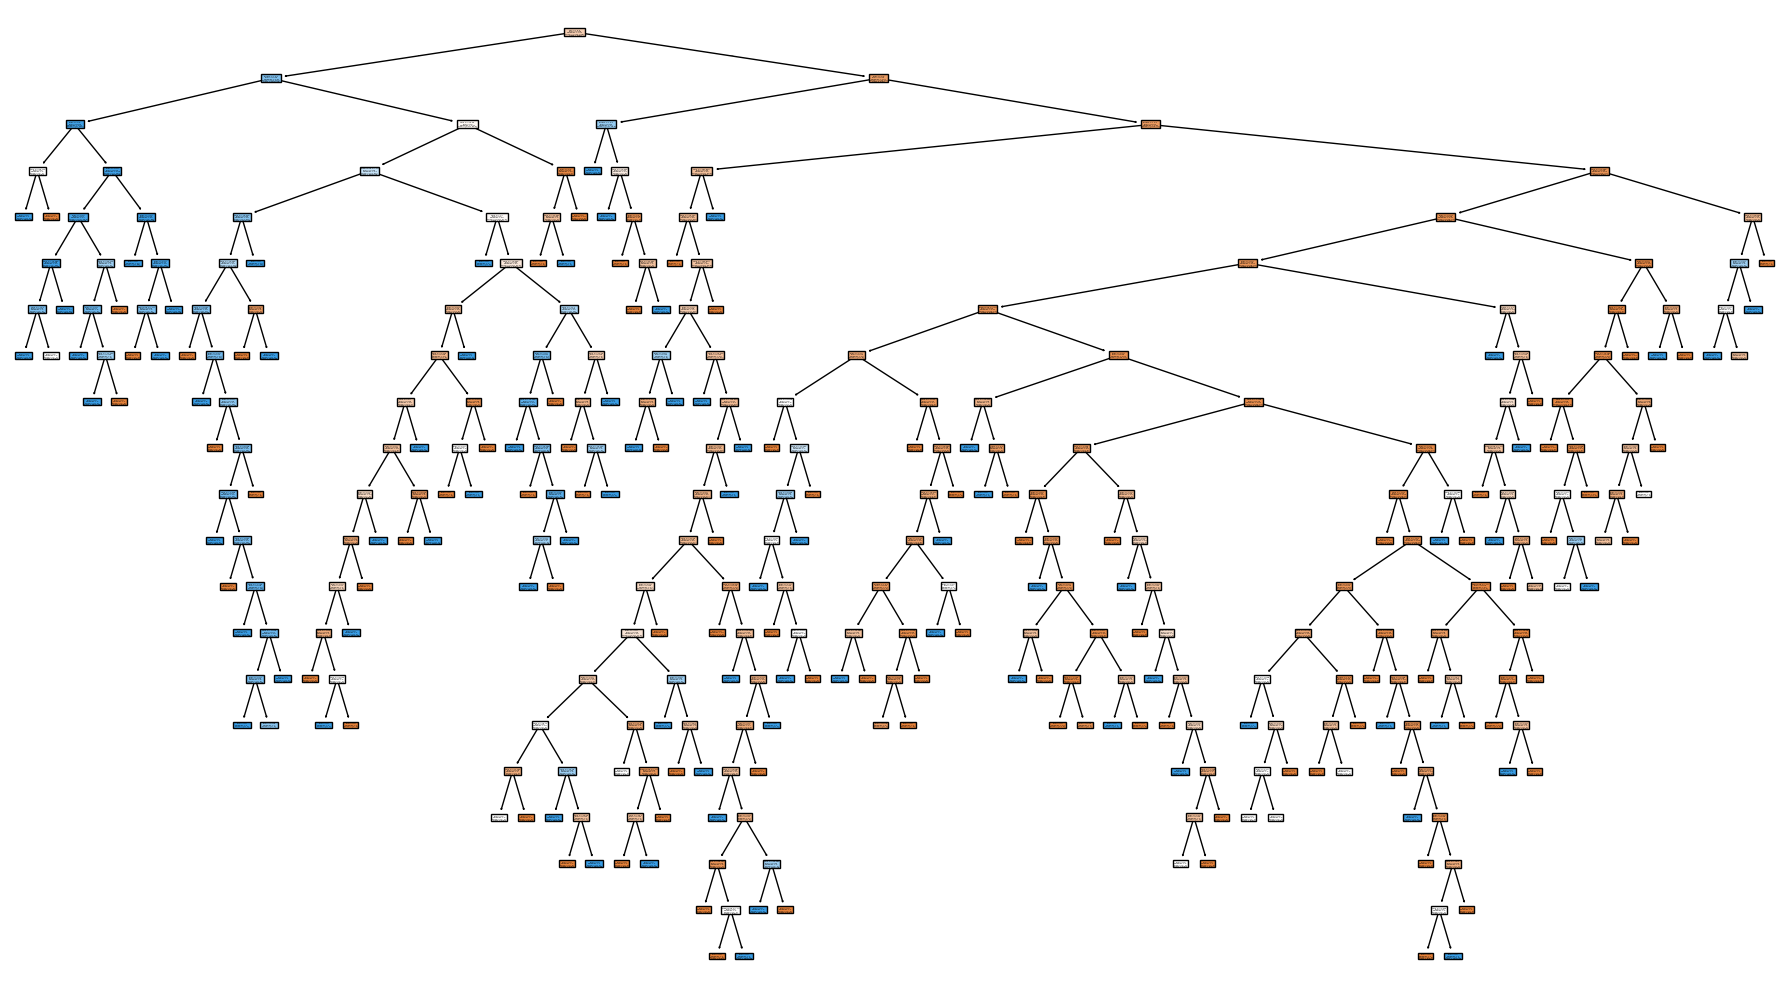

In [30]:
# plot Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died","survived"],
    filled=True
)

plt.tight_layout()
plt.show()

Decision Tree with Pre-Pruning

In [38]:
max_depth = [2,3,4,5,6,7,8,9,10]

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"For Depth = {depth}, Accuracy = {acc}")

For Depth = 2, Accuracy = 0.7653631284916201
For Depth = 3, Accuracy = 0.7988826815642458
For Depth = 4, Accuracy = 0.7988826815642458
For Depth = 5, Accuracy = 0.7988826815642458
For Depth = 6, Accuracy = 0.8044692737430168
For Depth = 7, Accuracy = 0.8044692737430168
For Depth = 8, Accuracy = 0.7877094972067039
For Depth = 9, Accuracy = 0.7932960893854749
For Depth = 10, Accuracy = 0.7988826815642458


In [43]:
sample_splits = [10,15,20,25,30]

for split in sample_splits:
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=split)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"For Split = {split} , Accuracy = {acc}")

For Split = 10 , Accuracy = 0.8268156424581006
For Split = 15 , Accuracy = 0.8268156424581006
For Split = 20 , Accuracy = 0.8268156424581006
For Split = 25 , Accuracy = 0.8100558659217877
For Split = 30 , Accuracy = 0.7988826815642458


Decision Tree with Post Pruning

In [45]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [67]:
# train model for all alphas
trees = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    tree.append((model,alpha))

In [97]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc < best_acc:
        best_acc = curr_acc
        best_alpha = alpha
